In [1]:
%load_ext autoreload
%matplotlib inline
%autoreload 2


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Test difference between my tables and Steve's tables

(-20.73203909100906, -2.068360655411844) (0.01, 0.6)
(-15.570458338804938, -2.2904585388049377)


Text(0,0.5,'ye')

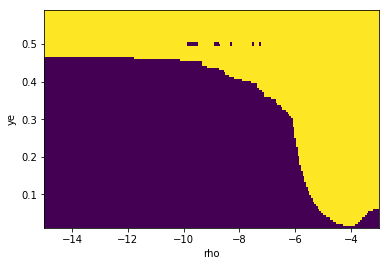

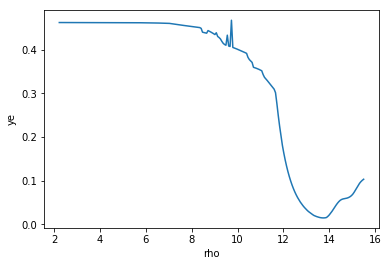

In [9]:
import deprecated_table as dt

h5_file = 'Hempel_SFHoEOS_rho222_temp180_ye60_version_1.1_20120817.h5'
fname ='eos_dat/Hempel_SFHoEOS_rho222_temp180_ye60_version_1.1_20120817.h5.dat'
data = np.loadtxt(fname).T

star = dt.TableStar(h5_file)
star.rho_interp
print(star.pres_bounds, star.ye_bounds)

x = np.linspace(-19, -3, 200)
y = np.linspace(0.011, 0.59, 100)
x,y = np.meshgrid(x,y)
z = star.munu_interp_pres(y,x)

print(star.rho_bounds)
x2 = np.linspace(-15, -3, 200)
x2,y2 = np.meshgrid(x2,y)
z2 = star.munu_interp_rho(y2,x2)
# plt.pcolormesh(x,y,z>0)
plt.pcolormesh(x2,y2,z2>0)
plt.xlabel('rho')
plt.ylabel('ye')

plt.figure()
plt.plot(data[1], data[-1])
plt.xlabel('rho')
plt.ylabel('ye')

# Plot our interpolated rho versus Steves values
Not much difference

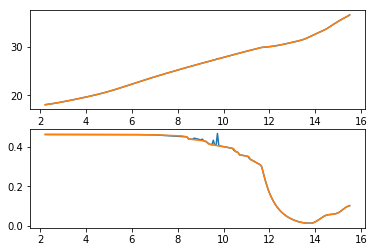

In [18]:
import h5py
# tab = h5py.File(fname)


from deprecated_table import TestTable
test = TestTable(h5_file)
x = test.rho_grid 
f = test.pres_interp
y = f(x)
x_cgs = x - np.log10(test.scaling['rho'])
y_cgs = y - np.log10(test.scaling['pres'])
fig, [ax1,ax2] = plt.subplots(2)
ax1.plot(data[1], data[0])
ax1.plot(x_cgs, y_cgs)
ax2.plot(data[1], data[-1])
ax2.plot(x_cgs, test.ye_arr)

# Does my 1D interpolators and steves file produce the same results?

In [19]:
from tools import run_star
from table_star import TableStar, StevesStar

/home/halvard/uio/PHY905_NumericalRelativity/project1/table_star.py:90: UserWarning: Error, more than one root in munu! Using closest to previous
  warnings.warn('Error, more than one root in munu! Using closest to previous')
/home/halvard/uio/PHY905_NumericalRelativity/project1/table_star.py:38: RuntimeWarning: invalid value encountered in log10
  logP = np.log10(P)


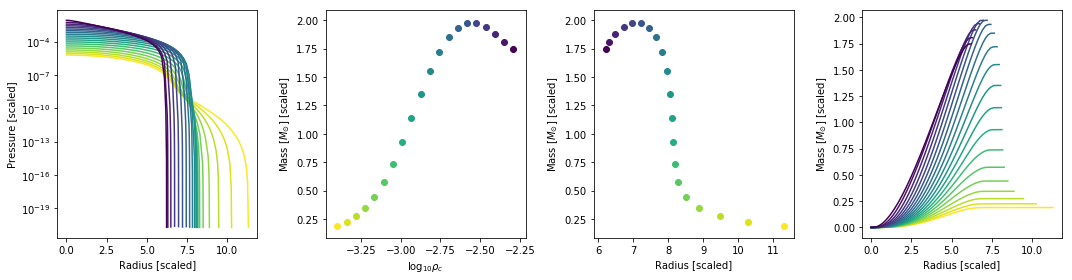

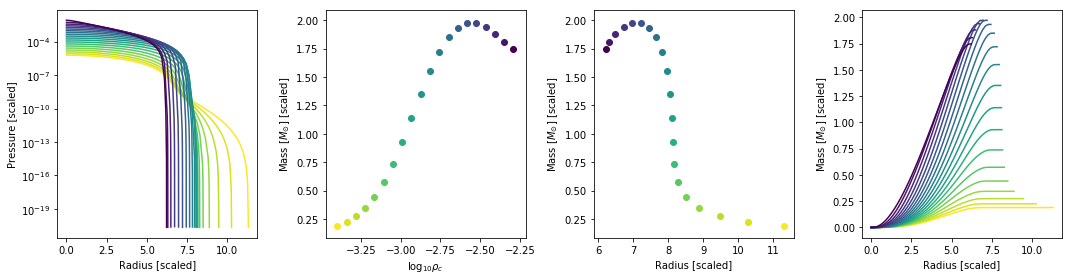

In [21]:
file =  'Hempel_SFHoEOS_rho222_temp180_ye60_version_1.1_20120817.h5'
h5_file = 'h5_files/' + file
steves_file ='eos_dat/' + file 

my = run_star(TableStar(h5_file))
steves = run_star(StevesStar(steves_file))

Seems to be a difference of< 0.1%:

In [22]:
r1 = np.array(my)[:,1] 
r2 = np.array(steves)[:,1]
m1 = np.array(my)[:,2] 
m2 = np.array(steves)[:,2]

np.abs(r1 - r2)/r1, np.abs(m1 - m2)/m1

(array([4.56842946e-05, 5.43449802e-05, 2.18246253e-05, 3.25616974e-04,
        2.06665313e-04, 3.59383642e-04, 2.27454222e-04, 5.58991353e-05,
        5.35550319e-05, 7.44167874e-05, 4.66975716e-05, 1.05536437e-05,
        8.09705636e-06, 4.43958536e-05, 8.59229517e-06, 1.77895839e-05,
        9.22183068e-06, 2.54753529e-05, 1.63973664e-05, 9.95996042e-06]),
 array([5.50505742e-04, 4.02882208e-04, 2.91216169e-04, 1.84570026e-04,
        1.04455538e-04, 5.71074889e-05, 3.18437896e-05, 1.78547098e-05,
        1.36200158e-05, 1.39870028e-05, 1.35215691e-05, 1.07653517e-05,
        9.63646227e-06, 8.22410607e-06, 7.31459651e-06, 6.64416670e-06,
        5.94244851e-06, 5.92867533e-06, 6.22504921e-06, 6.12964290e-06]))